<h1><b>Data Wrangling Exercises

In [1]:
import numpy as np
import pandas as pd
import os
import env
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

directory = os.getcwd()
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import for scaling data
from sklearn.preprocessing import MinMaxScaler

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")
import wrangle

<h4><b>Acquire data from the cloud database.
    
    You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.



In [2]:
SQL_query = '''
SELECT prop.*, 
       pred.logerror, 
       pred.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 

FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,
       					  logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL AND transactiondate <= '2017-12-31'
'''

In [3]:
from wrangle import get_data, SQL_query
df = get_data(SQL_query, directory, filename = 'zillow.csv')

In [4]:
df.shape

(77574, 69)

<h4><b>Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [5]:
from wrangle import summary_of_data
summary_of_data(df)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (77574, 69)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77574 non-null  int64  
 1   id                            77574 non-null  int64  
 2   parcelid                      77574 non-null  int64  
 3   airconditioningtypeid         25006 non-null  float64
 4   architecturalstyletypeid      206 non-null    float64
 5   basementsqft                  50 non-null     float64
 6   bathroomcnt                   77574 non-null  float64
 7   bedroomcnt                    77574 non-null  float64
 8   buildingclasstypeid           15 non-null     float64
 9   buildingqualitytypeid         49808 non-null  float64
 10

In [6]:
df.columns.value_counts().sum()

69

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbu

<h4><b>Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
from wrangle import nulls_by_col
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False).head(40)

,number_missing_rows,percent_rows_missing
buildingclasstypeid,77559,0.999807
buildingclassdesc,77559,0.999807
finishedsquarefeet13,77532,0.999459
storytypeid,77524,0.999355
storydesc,77524,0.999355
basementsqft,77524,0.999355
yardbuildingsqft26,77504,0.999098
fireplaceflag,77402,0.997783
architecturalstyletypeid,77368,0.997344
architecturalstyledesc,77368,0.997344


In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'airconditioningtypeid',
       'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbu

In [10]:
from wrangle import handle_missing_values
df = handle_missing_values(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77560 entries, 0 to 77573
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77560 non-null  int64  
 1   id                            77560 non-null  int64  
 2   parcelid                      77560 non-null  int64  
 3   bathroomcnt                   77560 non-null  float64
 4   bedroomcnt                    77560 non-null  float64
 5   buildingqualitytypeid         49808 non-null  float64
 6   calculatedbathnbr             76959 non-null  float64
 7   calculatedfinishedsquarefeet  77374 non-null  float64
 8   finishedsquarefeet12          73919 non-null  float64
 9   fips                          77560 non-null  float64
 10  fullbathcnt                   76959 non-null  float64
 11  heatingorsystemtypeid         49569 non-null  float64
 12  latitude                      77560 non-null  float64
 13  l

In [11]:
df.head(3)

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,...,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,NaN,Single Family Residential
1,1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,NaN,Single Family Residential
2,2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,NaN,Single Family Residential


In [12]:
df = df.drop(columns={'Unnamed: 0', 'id', 'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt'})

In [13]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc'],
      dtype='object')

<h4><b>Prepare

<h4><b>Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

<h4><b>Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

<h2><b>Mall Customers

<h4><b>Acquire data from the customers table in the mall_customers database.

In [14]:
SQL_query = 'select * from customers'

In [15]:
from wrangle import get_connection_url
def new_data(SQL_query):
    """
    This function will:
    - take in a SQL_query
    - create a connection_url to mySQL
    - return a df of the given query from the mall_customers db
    """
    url = get_connection_url('mall_customers')
    
    return pd.read_sql(SQL_query, url)

In [16]:
mall = new_data(SQL_query)
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h4><b>Summarize the data (include distributions and descriptive statistics).


In [17]:
summary_of_data(mall)

--------------------------------
--------------------------------
Information on DataFrame: 
Shape of Dataframe: (200, 5)
--------------------------------
Basic DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
--------------------------------
Missing Values by Column: 
customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64
Missing Values by Row: 
|    |   missing_cells |   percent_missing |
|---:|----------------:|------------------:|
|  0 |               0 |                 0 |
------------------------

array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'spending_score'}>]], dtype=object)

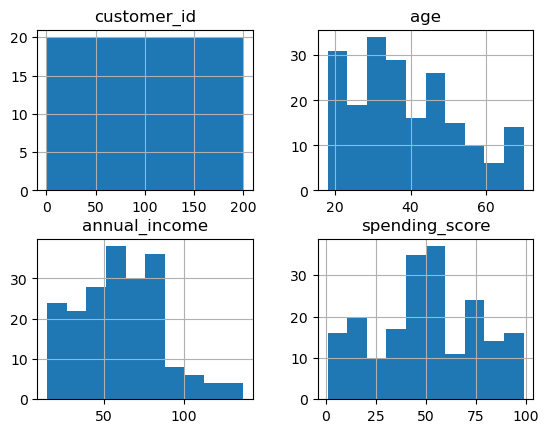

In [18]:
mall.hist()

In [19]:
mall_desc = mall.drop(columns='customer_id')

<Axes: >

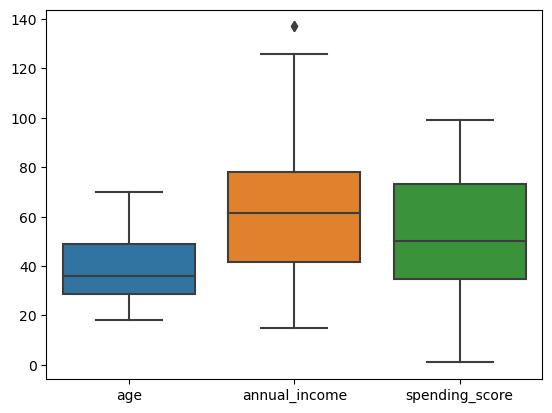

In [20]:
sns.boxplot(mall_desc)

<h4><b>Detect outliers using IQR.


> It appears that annual income is the only column that has outliers. Let's have a look breaking the column down by quartile

In [21]:
mall['annual_income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: annual_income, dtype: float64

In [22]:
mall['annual_income'].sort_values(ascending=False)

199    137
198    137
197    126
196    126
195    120
      ... 
5       17
2       16
3       16
1       15
0       15
Name: annual_income, Length: 200, dtype: int64

In [23]:
# function to detect and eliminate outliers using IQR rule

def outlier_function(df, cols, k):
    for col in df[cols]:
        q1 = mall.annual_income.quantile(0.25)
        q3 = mall.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr     
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [24]:
# use the outlier function defined above to handle outliers in numeric columns. k = 1.5

mall_df = outlier_function(mall, ['age', 'spending_score', 'annual_income'], 1.5)
mall_df.shape

(198, 5)

<h4><b>Encode categorical columns using a one hot encoder (pd.get_dummies).


In [25]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     198 non-null    int64 
 1   gender          198 non-null    object
 2   age             198 non-null    int64 
 3   annual_income   198 non-null    int64 
 4   spending_score  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.3+ KB


> I only need to encode the gender column ('object type')

In [26]:
dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns=['gender', 'customer_id'])
mall_df.head()

,age,annual_income,spending_score,Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


<h4><b>Split data into train, validate, and test.


In [27]:
train, validate, test = wrangle.split_data(mall_df)
train.shape, validate.shape, test.shape

((110, 4), (48, 4), (40, 4))

In [28]:
train.head()

,age,annual_income,spending_score,Male
45,24,39,65,0
39,20,37,75,0
11,35,19,99,0
171,28,87,75,1
95,24,60,52,1


<h4><b>Scaling


In [29]:
from wrangle import min_max_scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [30]:
train_scaled.head()

,age,annual_income,spending_score,Male
45,0.115385,0.216216,0.653061,0.0
39,0.038462,0.198198,0.755102,0.0
11,0.326923,0.036036,1.000000,0.0
171,0.192308,0.648649,0.755102,1.0
95,0.115385,0.405405,0.520408,1.0
